# Random Forest Classifier on the Iris Dataset


This notebook demonstrates how to implement a Random Forest Classifier on the Iris dataset.
We will explore the concepts of bootstrapping, feature randomness, and ensemble learning to understand how Random Forest improves prediction accuracy and robustness.


## Load and Prepare the Dataset

In [1]:

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


## Train-Test Split

In [2]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


## Train Random Forest Classifier

In [3]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=42)

## Evaluate the Model

In [4]:

from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
import pandas as pd
pd.DataFrame(report).T


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,15.000000
1,0.777778,0.933333,0.848485,15.000000
2,0.916667,0.733333,0.814815,15.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.898148,0.888889,0.887767,45.000000
weighted avg,0.898148,0.888889,0.887767,45.000000


## Confusion Matrix

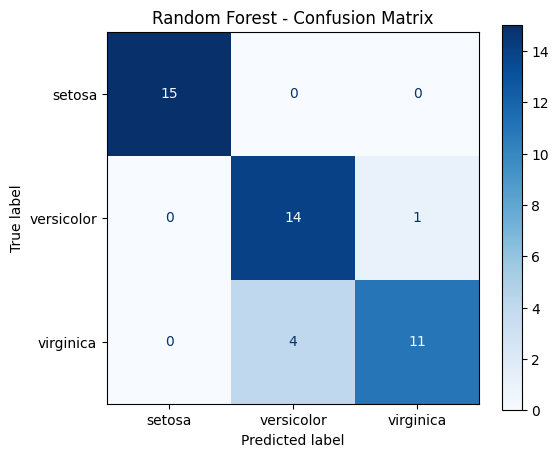

In [5]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Random Forest - Confusion Matrix")
plt.show()


## Feature Importance

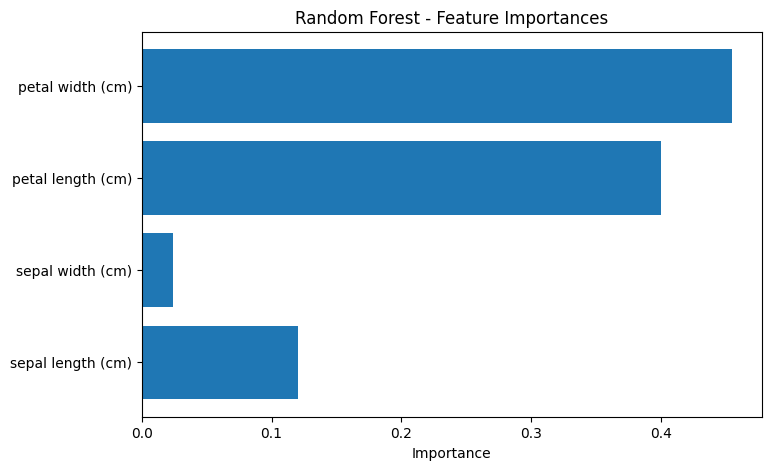

In [6]:

importances = rf_model.feature_importances_
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(iris.feature_names, importances)
ax.set_title("Random Forest - Feature Importances")
ax.set_xlabel("Importance")
plt.show()


## Out-of-Bag Score

In [7]:

print("Out-of-Bag Score:", rf_model.oob_score_)


Out-of-Bag Score: 0.9523809523809523
